In [ ]:
import pandas as pd
import os

# Assuming your CSV files are in a folder named 'data'
folder_path = r'/content/drive/MyDrive/players_data'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all CSV files
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows to ensure data is loaded correctly
print(combined_df.head())

   Unnamed: 0  POS                              Player  Runs  Mat  Inns  NO  \
0           0    1              Matthew Hayden CSK       572   12    12   1   
1           1    2               Adam Gilchrist DEC      495   16    16   0   
2           2    3                 Suresh Raina CSK      434   14    14   0   
3           3    4                     JP Duminy MI      372   13    12   3   
4           4    5             Herschelle Gibbs DEC      371   14    14   3   

    HS    Avg   BF      SR  100  50  4s  6s  year  
0   89   52.0  395  144.81    0   5  60  22  2009  
1   85  30.93  325  152.30    0   3  54  29  2009  
2   98   31.0  308  140.90    0   2  37  21  2009  
3   62  41.33  325  114.46    0   5  26  11  2009  
4  69*  33.72  331  112.08    0   4  32  12  2009  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values)

# Optionally, you can display rows with missing data
missing_data_df = combined_df[combined_df.isnull().any(axis=1)]
print(missing_data_df)


Unnamed: 0    0
POS           0
Player        0
Runs          0
Mat           0
Inns          0
NO            0
HS            0
Avg           0
BF            0
SR            0
100           0
50            0
4s            0
6s            0
year          0
dtype: int64
Empty DataFrame
Columns: [Unnamed: 0, POS, Player, Runs, Mat, Inns, NO, HS, Avg, BF, SR, 100, 50, 4s, 6s, year]
Index: []


In [ ]:
cleaned_df = combined_df.dropna()


In [ ]:
# Example: Filling missing values with a default value, such as 0 or the column mean
cleaned_df = combined_df.fillna(0)  # or you could use column means, e.g., combined_df.fillna(combined_df.mean())


In [ ]:
# Convert data types, handling non-numeric values
cleaned_df['Avg'] = pd.to_numeric(cleaned_df['Avg'], errors='coerce')
cleaned_df['SR'] = pd.to_numeric(cleaned_df['SR'], errors='coerce')

# Check data types to confirm the changes
print(cleaned_df.dtypes)

Unnamed: 0      int64
POS             int64
Player         object
Runs            int64
Mat             int64
Inns            int64
NO              int64
HS             object
Avg           float64
BF              int64
SR            float64
100             int64
50              int64
4s              int64
6s              int64
year            int64
dtype: object


In [ ]:
# Remove duplicate rows
cleaned_df = cleaned_df.drop_duplicates()

# Verify if duplicates were removed
print(cleaned_df.shape)


(2508, 16)


In [ ]:
# Save the cleaned data to a new CSV file
cleaned_df.to_csv('cleaned_batters_data.csv', index=False)


In [ ]:
#exploratory data analysis

   Unnamed: 0  POS                              Player  Runs  Mat  Inns  NO  \
0           0    1              Matthew Hayden CSK       572   12    12   1   
1           1    2               Adam Gilchrist DEC      495   16    16   0   
2           2    3                 Suresh Raina CSK      434   14    14   0   
3           3    4                     JP Duminy MI      372   13    12   3   
4           4    5             Herschelle Gibbs DEC      371   14    14   3   

    HS    Avg   BF      SR  100  50  4s  6s  year  
0   89  52.00  395  144.81    0   5  60  22  2009  
1   85  30.93  325  152.30    0   3  54  29  2009  
2   98  31.00  308  140.90    0   2  37  21  2009  
3   62  41.33  325  114.46    0   5  26  11  2009  
4  69*  33.72  331  112.08    0   4  32  12  2009  


<ipython-input-14-fc1f848f40a1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runs', y='Player', data=top_10_runs, palette='viridis')
<ipython-input-14-fc1f848f40a1>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SR', y='Player', data=top_10_sr, palette='coolwarm')
<ipython-input-14-fc1f848f40a1>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg', y='Player', data=top_10_avg, palette='magma')


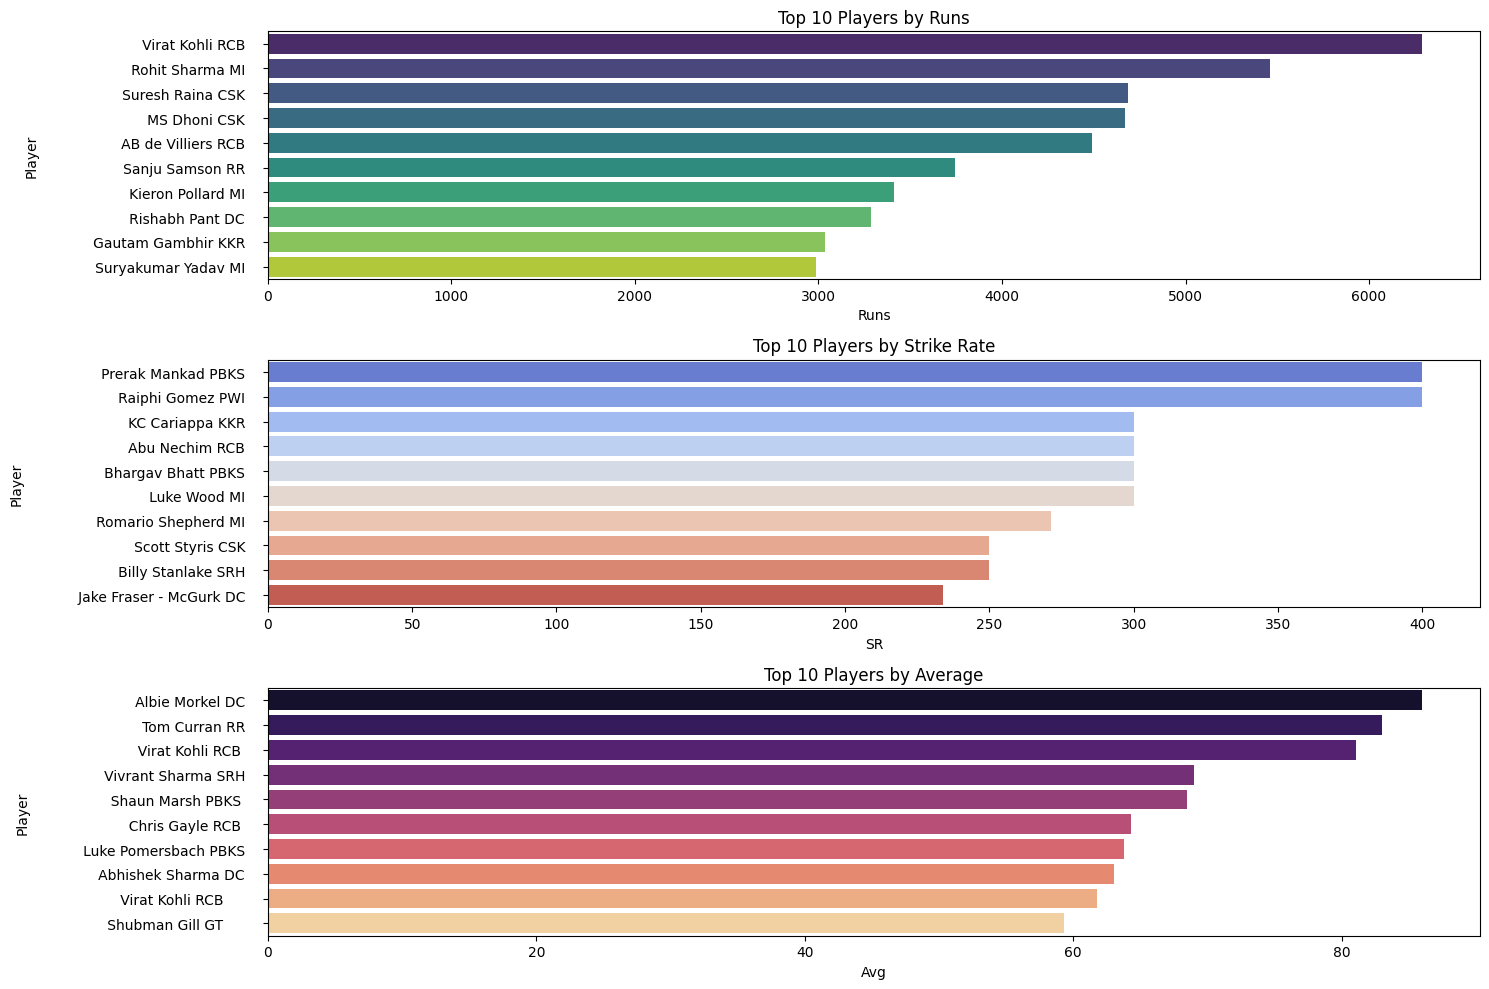

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cleaned_batters_data.csv')
print(df.head())

# Group by player and aggregate the sum of runs, mean of strike rate, and mean of average
top_performers = df.groupby('Player').agg({'Runs': 'sum', 'SR': 'mean', 'Avg': 'mean'}).reset_index()

# Top 10 players by Runs
top_10_runs = top_performers.sort_values(by='Runs', ascending=False).head(10)

# Top 10 players by Strike Rate
top_10_sr = top_performers.sort_values(by='SR', ascending=False).head(10)

# Top 10 players by Average
top_10_avg = top_performers.sort_values(by='Avg', ascending=False).head(10)

# Plotting the top 10 players by Runs, Strike Rate, and Average
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.barplot(x='Runs', y='Player', data=top_10_runs, palette='viridis')
plt.title('Top 10 Players by Runs')

plt.subplot(3, 1, 2)
sns.barplot(x='SR', y='Player', data=top_10_sr, palette='coolwarm')
plt.title('Top 10 Players by Strike Rate')

plt.subplot(3, 1, 3)
sns.barplot(x='Avg', y='Player', data=top_10_avg, palette='magma')
plt.title('Top 10 Players by Average')

plt.tight_layout()
plt.show()


In [ ]:
# Average runs per match for each player
df['AvgRunsPerMatch'] = df['Runs'] / df['Mat']
top_consistent_players = df.groupby('Player')['AvgRunsPerMatch'].mean().sort_values(ascending=False).head(10)
print("Top 10 most consistent players based on average runs per match:\n", top_consistent_players)


Top 10 most consistent players based on average runs per match:
 Player
          Virat Kohli RCB           60.812500
          Shaun Marsh PBKS          56.000000
      Shubman Gill GT               52.352941
      Jos Buttler RR                50.764706
          Chris Gayle RCB           49.766667
      Virat Kohli RCB               49.400000
           Chris Lynn MI            49.000000
          David Warner SRH          47.865079
          KL Rahul PBKS             47.857143
          Matthew Hayden CSK        47.666667
Name: AvgRunsPerMatch, dtype: float64


Hardik Pandya


<ipython-input-34-cfccb2d37b0b>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_filtered, x='year', y='Runs', estimator='mean', ci=None)


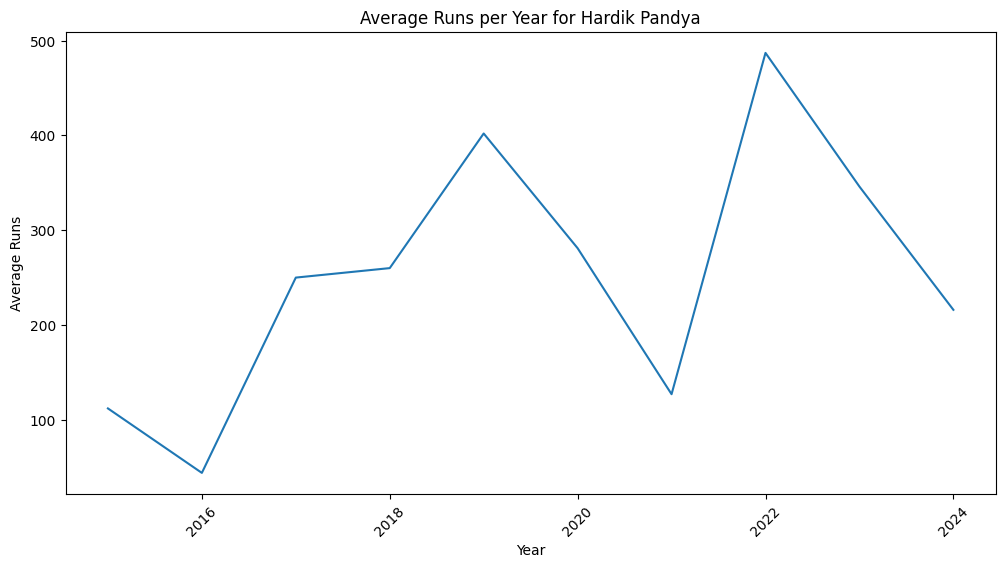

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'selected_player' is the name of the player you want to plot the graph for


selected_player = input()
df_filtered = df[df['Player'].str.contains(selected_player, case=False)]


# Plotting the graph for the selected player
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='year', y='Runs', estimator='mean', ci=None)
plt.title(f'Average Runs per Year for {selected_player}')
plt.xlabel('Year')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-ec12a025a87c>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='4s', y='Player', data=top_10_fours, palette='Blues')
<ipython-input-19-ec12a025a87c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='6s', y='Player', data=top_10_sixes, palette='Reds')


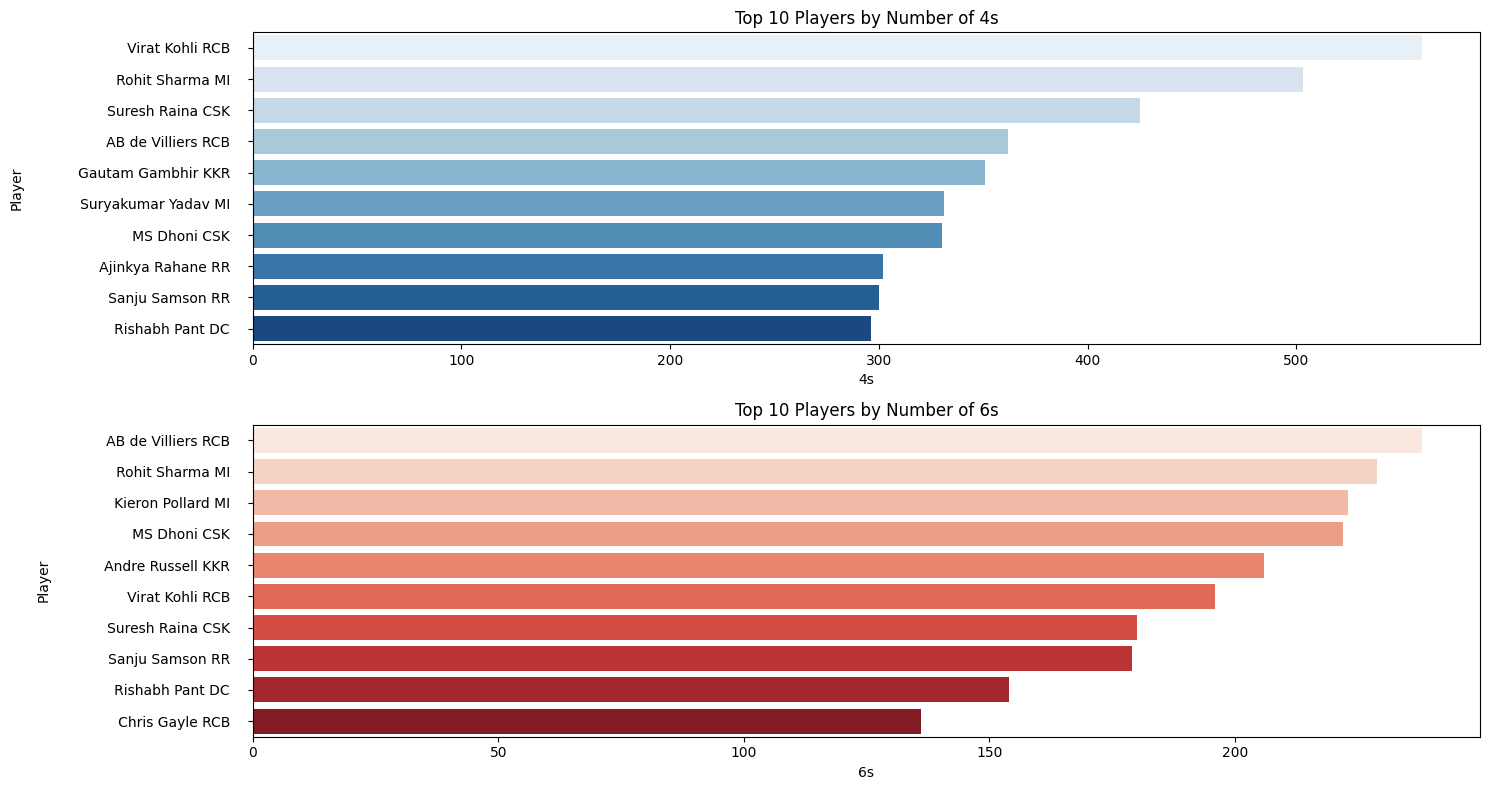

In [ ]:
# Group by player and sum up the 4s and 6s
boundary_analysis = df.groupby('Player').agg({'4s': 'sum', '6s': 'sum'}).reset_index()

# Top 10 players by number of 4s
top_10_fours = boundary_analysis.sort_values(by='4s', ascending=False).head(10)

# Top 10 players by number of 6s
top_10_sixes = boundary_analysis.sort_values(by='6s', ascending=False).head(10)

# Plotting the boundary analysis
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sns.barplot(x='4s', y='Player', data=top_10_fours, palette='Blues')
plt.title('Top 10 Players by Number of 4s')

plt.subplot(2, 1, 2)
sns.barplot(x='6s', y='Player', data=top_10_sixes, palette='Reds')
plt.title('Top 10 Players by Number of 6s')

plt.tight_layout()
plt.show()


In [ ]:
#advanced analysis

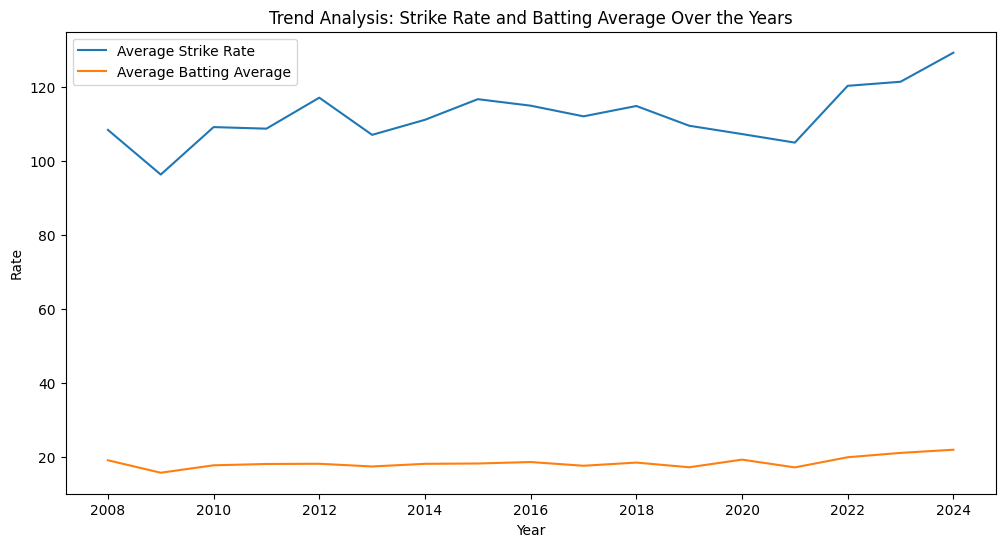

<ipython-input-33-1be692401461>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='100', data=yearly_trends, palette='magma')


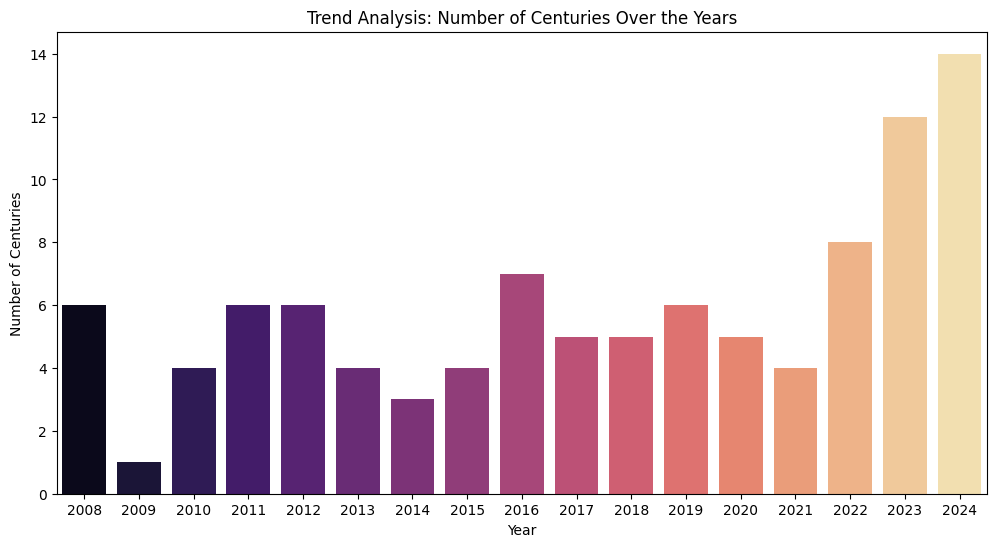

In [ ]:
# Group by year and calculate the mean of the strike rate and number of 100s
# Convert 'SR', 'Avg', and '100' columns to numeric, handling errors
yearly_trends = combined_df.groupby('year').agg({
    'SR': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    'Avg': lambda x: pd.to_numeric(x, errors='coerce').mean(),
    '100': lambda x: pd.to_numeric(x, errors='coerce').sum()
}).reset_index()

# Plotting the trend in strike rate and average
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='SR', data=yearly_trends, label='Average Strike Rate')
sns.lineplot(x='year', y='Avg', data=yearly_trends, label='Average Batting Average')
plt.title('Trend Analysis: Strike Rate and Batting Average Over the Years')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Plotting the trend in the number of 100s
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='100', data=yearly_trends, palette='magma')
plt.title('Trend Analysis: Number of Centuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Centuries')
plt.show()
